# Basics of Jaxley

In [2]:
from jax import config
config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
from jax import jit

import jaxley as jx
from jaxley.channels import Na, K, Leak
from jaxley.synapses import IonotropicSynapse
from jaxley.connect import fully_connect

## Defining cell

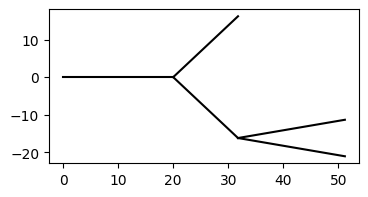

In [3]:
comp = jx.Compartment()
# BY SPECIFYING NCOMP YOU SAY HOW MANY COMP IN A BRANCH
branch = jx.Branch(comp, ncomp=2)
#parents = jnp.asarray([-1, 0, 0, 1, 1,1])
parents = jnp.asarray([-1,0,0,1,1])
cell = jx.Cell(branch, parents=parents)

cell.compute_xyz()  # Only needed for visualization.

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
_ = cell.vis(ax=ax, col="k")

## Insert mechanisms 

In [4]:
cell.insert(Leak())
cell.branch(0).insert(Na())
cell.branch(0).insert(K())
cell.nodes # .nodes lists all properties

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,...,Na,Na_gNa,eNa,vt,Na_m,Na_h,K,K_gK,eK,K_n
0,0,0,0,10.0,1.0,5000.0,1.0,-70.0,0,0,...,True,0.05,50.0,-60.0,0.2,0.2,True,0.005,-90.0,0.2
1,0,0,1,10.0,1.0,5000.0,1.0,-70.0,0,0,...,True,0.05,50.0,-60.0,0.2,0.2,True,0.005,-90.0,0.2
2,0,1,0,10.0,1.0,5000.0,1.0,-70.0,0,1,...,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,0,1,1,10.0,1.0,5000.0,1.0,-70.0,0,1,...,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
4,0,2,0,10.0,1.0,5000.0,1.0,-70.0,0,2,...,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
5,0,2,1,10.0,1.0,5000.0,1.0,-70.0,0,2,...,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
6,0,3,0,10.0,1.0,5000.0,1.0,-70.0,0,3,...,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
7,0,3,1,10.0,1.0,5000.0,1.0,-70.0,0,3,...,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
8,0,4,0,10.0,1.0,5000.0,1.0,-70.0,0,4,...,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
9,0,4,1,10.0,1.0,5000.0,1.0,-70.0,0,4,...,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [5]:
# get properties of specific branch
cell.branch(1).nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,Leak,Leak_gLeak,...,Na_m,Na_h,K,K_gK,eK,K_n,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
2,0,0,0,10.0,1.0,5000.0,1.0,-70.0,True,0.0001,...,NaN,NaN,False,NaN,NaN,NaN,0,1,2,1
3,0,0,1,10.0,1.0,5000.0,1.0,-70.0,True,0.0001,...,NaN,NaN,False,NaN,NaN,NaN,0,1,3,1


Jaxley uses same units as NEURON simulator: 
Units used in NEURON. **Some things like point processes have different units**
https://www.neuron.yale.edu/neuron/static/docs/units/unitchart.html



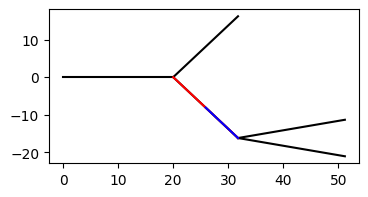

In [6]:
# you can color branches after creating a visualization
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
_ = cell.vis(ax=ax, col="k")
_ = cell.branch(1).vis(ax=ax, col="r")
_ = cell.branch(1).comp(1).vis(ax=ax, col="b")

## Changing Parameters

In [7]:
# use the .set method by specifiyin a parameter str and then a
# value to set it to 
cell.branch(1).set("axial_resistivity", 200.0)
cell.branch(1).nodes
cell.branch(0).set("K_gK", 0.01)  # modify potassium conductance.
cell.set("v", -65.0)  # modify initial voltage.


## Stimulate the cell

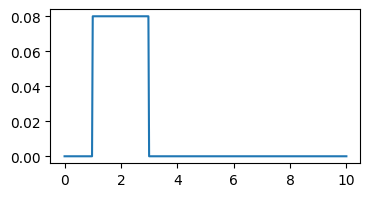

In [ ]:
# For defining the step current with which to stimulate cell
dt = 0.025
t_max = 10.0
time_vec = np.arange(0, t_max+dt, dt)
current = jx.step_current(i_delay=1.0, i_dur=2.0, i_amp=0.08, delta_t=dt, t_max=t_max)

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
_ = plt.plot(time_vec, current)

In [ ]:
# reset stimuli 
cell.delete_stimuli() 

# stimulate one compartment
cell.branch(0).loc(0.0).stimulate(current)

# cell.externals gives array of current

Added 1 external_states. See `.externals` for details.


## Define recording

Basic workflow seems to be to first define stimulation and then define recording and finally simulate cell response

In [13]:
cell.delete_recordings()
cell.branch(0).loc(0.0).record("v")
cell.branch(3).loc(1.0).record("v")

cell.recordings

Added 1 recordings. See `.recordings` for details.
Added 1 recordings. See `.recordings` for details.


,rec_index,state
0,0,v
0,7,v


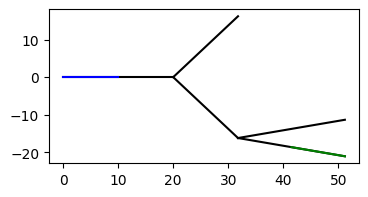

In [15]:
# visualize the beanches where you inserted 
# the recs
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
_ = cell.vis(ax=ax)
_ = cell.branch(0).loc(0.0).vis(ax=ax, col="b")
_ = cell.branch(3).loc(1.0).vis(ax=ax, col="g")

## Simulate the cell response 

In [16]:
# run simulation with .integrate 
voltages = jx.integrate(cell, delta_t=dt)
print("voltages.shape", voltages.shape)
# output shape is 2 bc two rec sites and 402 time steps

voltages.shape (2, 402)


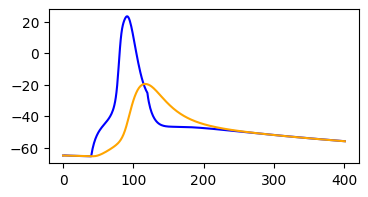

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
_ = ax.plot(voltages[0], c="b")
_ = ax.plot(voltages[1], c="orange")